In [1]:
!pip install pandas numpy seaborn



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_test = pd.read_csv('titanic/test.csv')
data_train = pd.read_csv('titanic/train.csv')




In [3]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Rename the necessary columns

In [5]:
data_train = data_train.rename(columns={'Name':'Full Name','Pclass':'Class'})
data_train.head()

,PassengerId,Survived,Class,Full Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_train.isnull().sum()

,0
PassengerId,0
Survived,0
Class,0
Full Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Heatmap of missing values

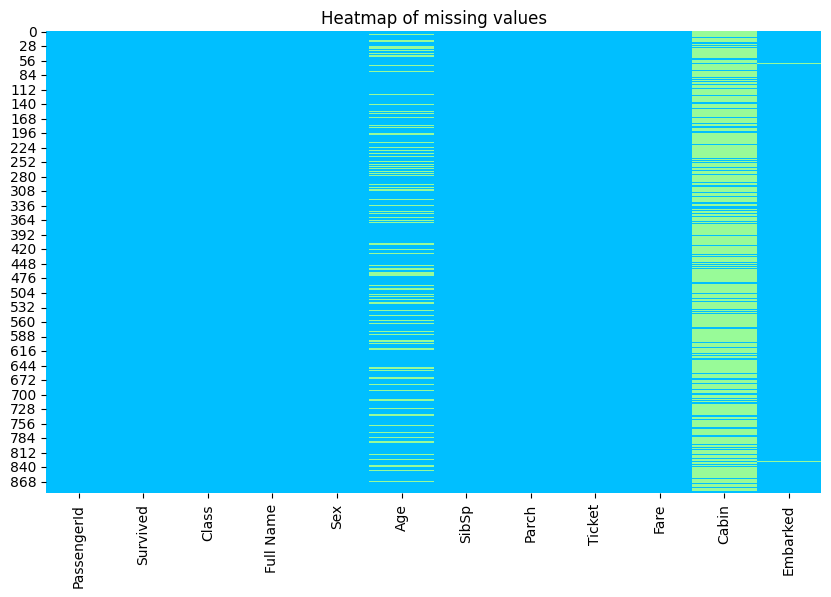

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data_train.isnull().astype(int),
            cbar=False,
            cmap=sns.color_palette(['deepskyblue', 'palegreen']))
plt.title('Heatmap of missing values')
plt.show()

Find out the total amount of male and female passangers:

In [8]:
male = data_train.loc[data_train.Sex == 'male']['Sex'].count()
print(male)

female = data_train.loc[data_train.Sex =='female']['Sex'].count()
print(female)




577
314


Show on a label the amount of male and female passangers

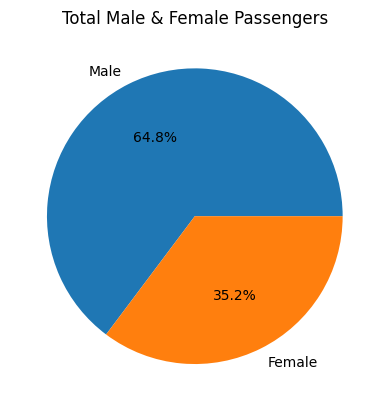

In [9]:
plt.pie([male,female],labels=['Male','Female'],autopct='%1.1f%%')
plt.title('Total Male & Female Passengers')
plt.show()

Lets find out how many women survived the wreck


In [10]:
data_women = data_train.loc[data_train.Sex == 'female']['Survived']

rate_women = sum(data_women)/len(data_women)
percentage2 = int(rate_women*100)
print(percentage2)


74


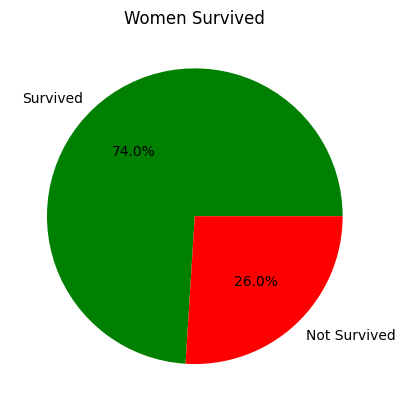

In [11]:
plt.pie([percentage2,100-percentage2],labels=['Survived','Not Survived'],autopct='%1.1f%%',colors= ['green','red'])
plt.title('Women Survived')
plt.show()


Now lets figure out the amount of men that survived the ship wreck


In [12]:
men_data = data_train.loc[data_train.Sex =='male']['Survived']

rate_men = sum(men_data)/len(men_data)


percentage1 = int(rate_men * 100)
print(percentage1)

18


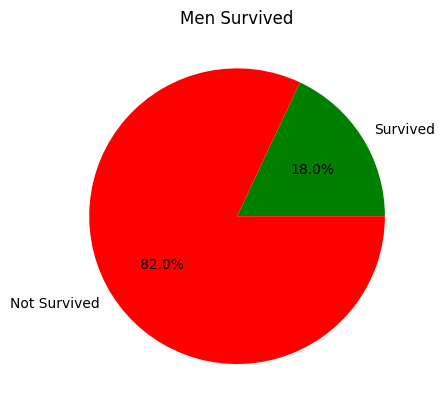

In [13]:
plt.pie([percentage1,100-percentage1],labels=['Survived','Not Survived'],autopct='%1.1f%%',colors= ['green','red'])
plt.title('Men Survived')
plt.show()

Once we know the above information, lets label it out on a diagram.

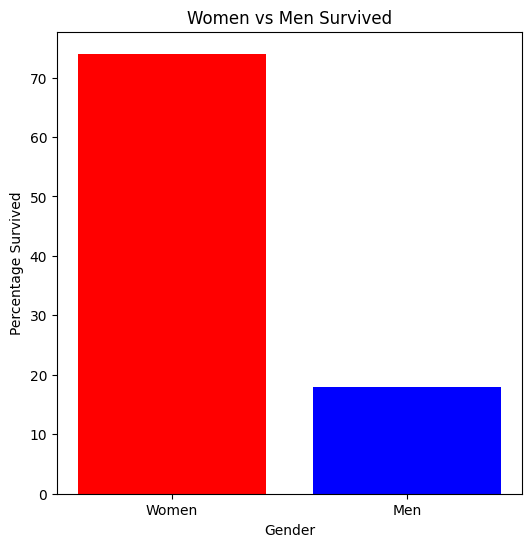

In [14]:
plt.figure(figsize=(6, 6))
plt.title('Women vs Men Survived')
plt.bar(['Women','Men'],[percentage2,percentage1], color =['red','blue'])
plt.ylabel('Percentage Survived')
plt.xlabel('Gender')
plt.grid(False)
plt.show()


#Lets check out now if there are more adults or childern on the ship:


In [15]:
adults = data_train.loc[data_train.Age >= 18]['Age'].count()
print(adults)

children = data_train.loc[data_train.Age <18]['Age'].count()
print(children)

601
113


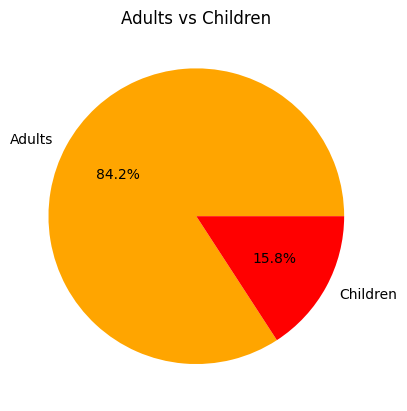

In [16]:
plt.pie([adults,children],labels=['Adults','Children'],autopct='%1.1f%%',colors= ['Orange','Red'])
plt.title('Adults vs Children')
plt.show()

Now lets compare the percentage of children that survived and seperately the adults.


In [17]:
child_survive = data_train.loc[(data_train.Age <= 18) & (data_train.Survived ==1), 'Survived'].count()

print(child_survive)

# now let's find out how many children there were altogether.

child_total = data_train.loc[data_train.Age <=18]['Age'].count()
print(child_total)

percentage_child = int((child_survive/child_total *100))
print(f"{percentage_child}% of children survived")

70
139
50% of children survived


In [18]:


survived_women = data_train.loc[(data_train.Sex == 'female') & (data_train.Survived == 1)]['Survived'].count()
print(survived_women)

survived_men = data_train.loc[(data_train.Sex =='male')& (data_train.Survived == 1)]['Survived'].count()
print(survived_men)

survived_children = data_train.loc[(data_train.Age <=18) & (data_train.Survived == 1)]['Survived'].count()
print(survived_children)

233
109
70


342


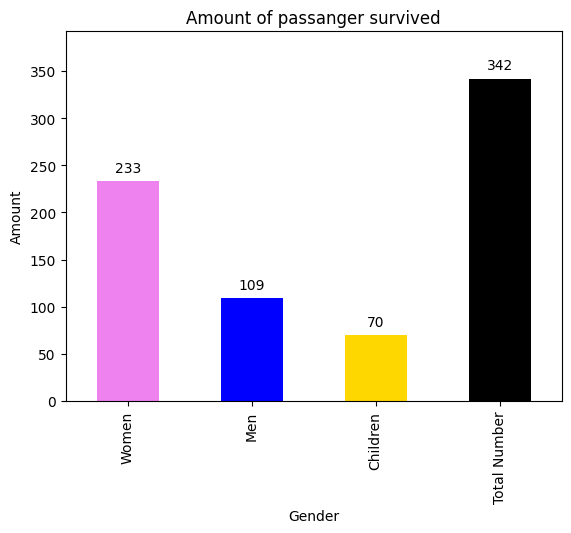

In [19]:

total_amount_ppl = data_train.loc[data_train.Survived == 1]['Survived'].count()
print(total_amount_ppl)

survivors = [survived_women,survived_men,survived_children,total_amount_ppl]

data_series = pd.Series(survivors,index=['Women','Men','Children','Total Number'])

data_graph = data_series.plot(kind='bar',title='Amount of passanger survived',xlabel='Gender',ylabel='Amount', x='data',y='1000',color = ['violet','blue','gold','black'])

for i, value in enumerate(survivors):
    plt.text(i, value + 10, str(value), ha='center', fontsize=10)  # Adjust +10 if needed for spacing

plt.ylim(0, max(survivors) + 50)  # Optional: add space above bars
plt.show()


Lets find out the number of people that died in first class

In [20]:
survived_1st = data_train.loc[(data_train.Survived == 1) & (data_train.Class == 1),'Class'].count()

total_1st = data_train.loc[data_train.Class == 1]['Class'].count()

percentage_1st = int((survived_1st/total_1st *100))
print(f"{percentage_1st}% survived in first class")

62% survived in first class


Lets find out the amount of people that survived in second class


In [21]:
survived_2nd = data_train.loc[(data_train.Survived == 1) & (data_train.Class == 2), 'Class'].count()

total_2nd = data_train.loc[data_train.Class == 2]['Class'].count()
percentage_2nd = int((survived_2nd/total_2nd *100))
print(f"{percentage_2nd}% survived in second class")

47% survived in second class


Amount of survivals in 3rd class

In [22]:
survived_3rd = data_train.loc[(data_train.Survived == 1)& (data_train.Class == 3), 'Class'].count()
total_3rd = data_train.loc[data_train.Class == 3]['Class'].count()

percentage_3rd = int((survived_3rd/total_3rd*100))
print(f"{percentage_3rd}% survived in third class")

24% survived in third class


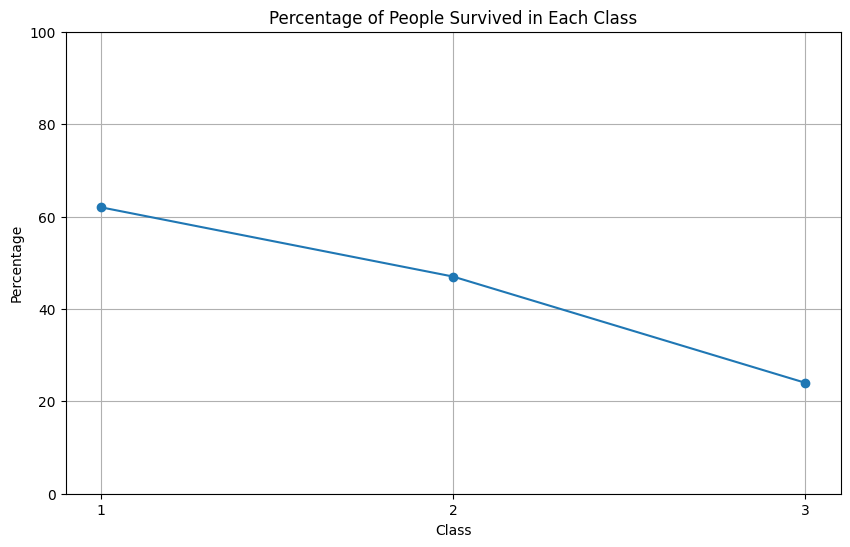

In [23]:
x = [1, 2, 3]

y = [percentage_1st, percentage_2nd, percentage_3rd]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.title('Percentage of People Survived in Each Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks([1, 2, 3])
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# The amount of people that survived per class in units

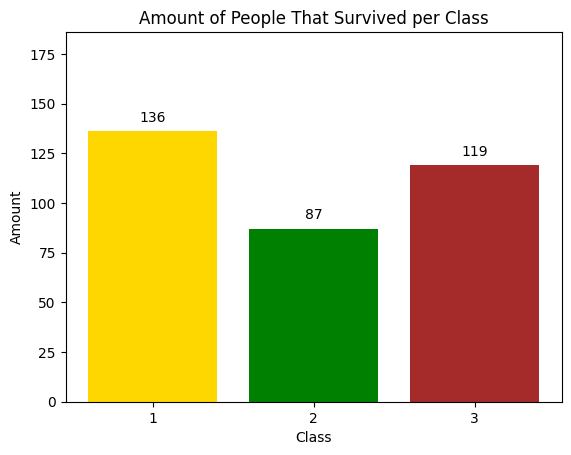

In [24]:
classes = [1, 2, 3]
values = [survived_1st, survived_2nd, survived_3rd]
colors = ['gold', 'green', 'brown']

# Create the bar chart
plt.bar(classes, values, color=colors)
plt.title('Amount of People That Survived per Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks(classes)

# Add labels above bars
for i, val in enumerate(values):
    plt.text(classes[i], val + 5, str(val), ha='center', fontsize=10)  # Adjust +5 for spacing

plt.ylim(0, max(values) + 50)  # Optional: ensure space above bars
plt.show()

# LEts create a barchart where I showcase the amount of people that were originally in each class and how many didn't survive



In [74]:
first_class_full = data_train.loc[data_train.Class == 1]['Class'].count()
print(first_class_full)
second_class_full = data_train.loc[data_train.Class == 2]['Class'].count()
print(second_class_full)
third_class_full = data_train.loc[data_train.Class == 3]['Class'].count()
print(third_class_full)

216
184
491


In [76]:
first_class_died = data_train.loc[(data_train.Class == 1) & (data_train.Survived == 0)]['Survived'].count()
print(first_class_died)


second_class_died = data_train.loc[(data_train.Class == 2) & (data_train.Survived == 0)]['Survived'].count()
print(second_class_died)

third_class_died = data_train.loc[(data_train.Class == 3) & (data_train.Survived == 0)]['Survived'].count()
print(third_class_died)

80
97
372


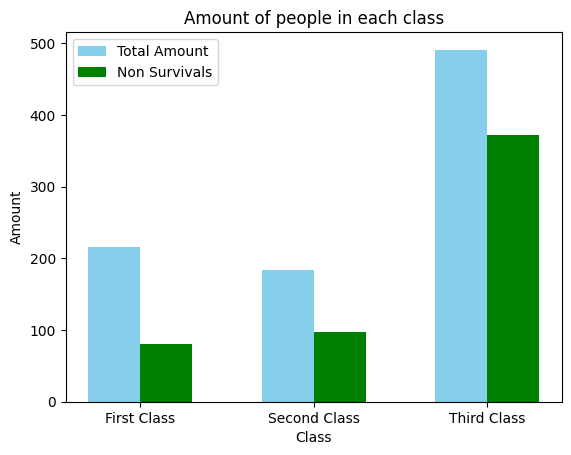

In [83]:
class_category = ['First Class','Second Class','Third Class']

class_full = [first_class_full,second_class_full,third_class_full]

class_died = [first_class_died,second_class_died,third_class_died]

x = range(len(class_category))
bar_width = 0.3

plt.bar(x,class_full,width=bar_width,label='Total Amount',color='skyblue')
plt.bar([p + bar_width for p in x], class_died, width=bar_width, label='Non Survivals', color='green')
plt.title('Amount of people in each class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks([p + bar_width/2 for p in x], class_category)
plt.legend()
plt.show()

# Class distribution by passangers


first lets calculate percentage of each class

In [25]:
first_class = data_train.loc[data_train.Class == 1]['Class'].count()
second_class = data_train.loc[data_train.Class == 2]['Class'].count()
third_class = data_train.loc[data_train.Class == 3]['Class'].count()

first_percentage = int((first_class/total_amount_ppl *100))
second_percentage = int((second_class/total_amount_ppl *100 +1))
third_percentage = int((third_class/total_amount_ppl *100))

total_percentage = first_percentage,second_percentage,third_percentage

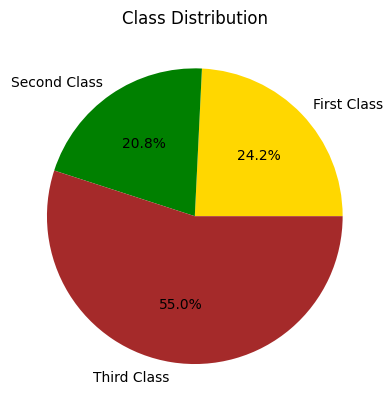

In [26]:
plt.pie(total_percentage,labels=['First Class','Second Class','Third Class'],autopct='%1.1f%%',colors= ['gold','green','brown'])
plt.title('Class Distribution')
plt.show()

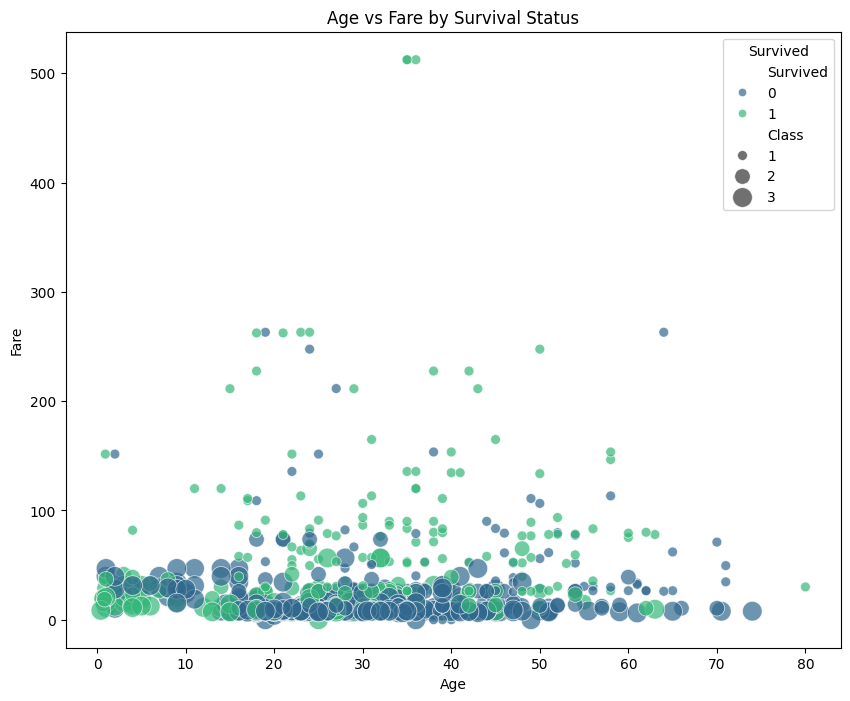

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data_train, palette='viridis', size='Class', sizes=(50, 200), alpha=0.7)
plt.title('Age vs Fare by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.savefig('age_fare_scatter.png')
plt.show()

# Lets now calculate the amount of people that embarked on each station

In [28]:
count_Cherbourg = data_train.loc[data_train.Embarked == 'C']['Embarked'].count()
print(f"{count_Cherbourg} people embarked in Cherbourg")

count_Southampton = data_train.loc[data_train.Embarked == 'S']['Embarked'].count()
print(f"{count_Southampton} people embarked in Southampton")

count_Queenstown = data_train.loc[data_train.Embarked == 'Q']['Embarked'].count()
print(f"{count_Queenstown} people embarked in Queenstown")

168 people embarked in Cherbourg
644 people embarked in Southampton
77 people embarked in Queenstown


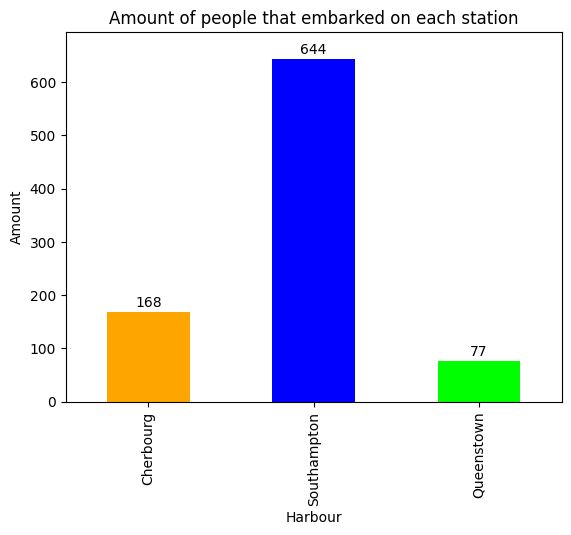

In [29]:
embarks = [count_Cherbourg,count_Southampton,count_Queenstown]
data_series = pd.Series(embarks,index=['Cherbourg','Southampton','Queenstown'])

data_graph = data_series.plot(kind='bar',title='Amount of people that embarked on each station',xlabel='Harbour',ylabel='Amount', x='data',y='1000',color = ['orange','blue','lime'])


for i, value in enumerate(embarks):
    plt.text(i, value + 10, str(value), ha='center', fontsize=10)  # Adjust +10 if needed for spacing

plt.ylim(0, max(embarks) + 50)  # Optional: add space above bars
plt.show()

# Amount of people that survived from each embark

In [30]:
surived_Cherbourg = data_train.loc[(data_train.Survived == 1) & (data_train.Embarked == 'C')]['Embarked'].count()


survived_Southampton = data_train.loc[(data_train.Survived == 1) & (data_train.Embarked == 'S')]['Embarked'].count()

survived_Queenstown = data_train.loc[(data_train.Survived == 1) & (data_train.Embarked == 'Q')]['Embarked'].count()

print(f"{surived_Cherbourg} people survived from Cherbourg")
print(f"{survived_Southampton} people survived from Southampton")
print(f"{survived_Queenstown} people survived from Queenstown")

93 people survived from Cherbourg
217 people survived from Southampton
30 people survived from Queenstown


# Now lets compare both of the results side by side

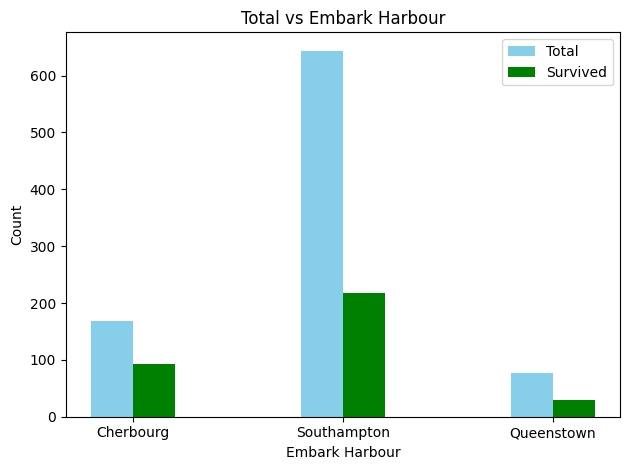

In [31]:
categories = ['Cherbourg','Southampton','Queenstown']
total_counts = [count_Cherbourg,count_Southampton,count_Queenstown]
embark_survived = [surived_Cherbourg,survived_Southampton,survived_Queenstown]

bar_width = 0.2
x = range(len(categories))

plt.bar(x, total_counts, width=bar_width, label='Total', color='skyblue')
plt.bar([p + bar_width for p in x], embark_survived, width=bar_width, label='Survived', color='green')

plt.xlabel('Embark Harbour')
plt.ylabel('Count')
plt.title('Total vs Embark Harbour')
plt.xticks([p + bar_width/2 for p in x], categories)
plt.legend()

plt.tight_layout()
plt.show()




In [32]:
data_train.head(20)

,PassengerId,Survived,Class,Full Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Do a bar graph comparing the initial family size and how many actually survived on average


First lets calculate how many different number of families there were


In [33]:
one_person_family = data_train.loc[data_train.SibSp == 0].shape[0]
print(f"{one_person_family} people don't have siblings")

two_people_family = data_train.loc[data_train.SibSp == 1].shape[0]
print(f"{two_people_family} people have 1 sibling")

three_people_family = data_train.loc[data_train.SibSp == 2].shape[0]
print(f"{three_people_family} people have 2 siblings")

four_people_family = data_train.loc[data_train.SibSp == 3].shape[0]
print(f"{four_people_family} people have 3 siblings")

five_people_family = data_train.loc[data_train.SibSp == 4].shape[0]
print(f"{five_people_family} people have 4 siblings or more")



608 people don't have siblings
209 people have 1 sibling
28 people have 2 siblings
16 people have 3 siblings
18 people have 4 siblings or more


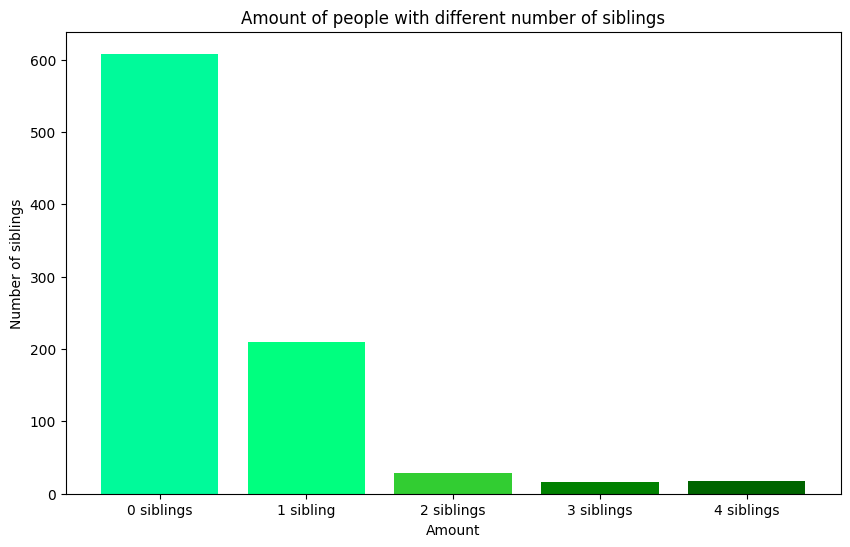

In [34]:
values = [one_person_family,two_people_family,three_people_family,four_people_family,five_people_family]

siblings = ['0 siblings','1 sibling','2 siblings','3 siblings','4 siblings']

colors = ['mediumspringgreen','springgreen','limegreen','green','darkgreen']

plt.figure(figsize=(10, 6))
bars = plt.bar(siblings,values,color = colors)
plt.title('Amount of people with different number of siblings')
plt.xlabel('Amount')
plt.ylabel('Number of siblings')
plt.show()





Now we need to find out how many people died who had or didn't have siblings


---



In [35]:
one_person_family_survived =data_train.loc[(data_train.Survived == 0) & (data_train.SibSp == 0)].shape[0]
print(f"{one_person_family_survived} people with 0 siblings died")

two_people_family_survived = data_train.loc[(data_train.Survived == 0)& (data_train.SibSp == 1)].shape[0]
print(f"{two_people_family_survived} people with 1 sibling died")

three_people_family_survived = data_train.loc[(data_train.Survived == 0) & (data_train.SibSp == 2)].shape[0]
print(f"{three_people_family_survived} people with 2 siblings died")

four_people_family_survived = data_train.loc[(data_train.Survived == 0 ) & (data_train.SibSp == 3)].shape[0]
print(f"{four_people_family_survived} people with 3 siblings died")

five_people_family_survived = data_train.loc[(data_train.Survived == 0) & (data_train.SibSp == 4)].shape[0]
print(f"{five_people_family_survived} people with 4 siblings died")


398 people with 0 siblings died
97 people with 1 sibling died
15 people with 2 siblings died
12 people with 3 siblings died
15 people with 4 siblings died


Now lets combine both of the datasets together


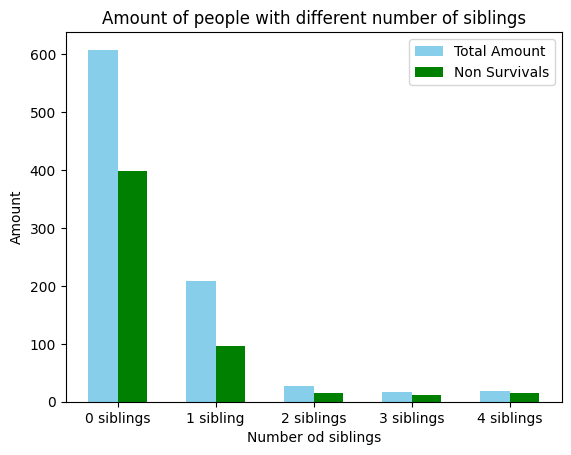

In [36]:
siblings = ['0 siblings','1 sibling','2 siblings','3 siblings','4 siblings']

values = [one_person_family,two_people_family,three_people_family,four_people_family,five_people_family]

died_values = [one_person_family_survived,two_people_family_survived,three_people_family_survived,four_people_family_survived,five_people_family_survived]

bar_width = 0.3
x = range(len(siblings))

plt.bar(x,values,width=bar_width,label='Total Amount',color='skyblue')
plt.bar([p + bar_width for p in x], died_values, width=bar_width, label='Non Survivals', color='green')
plt.title('Amount of people with different number of siblings')
plt.xlabel('Number od siblings')
plt.ylabel('Amount')
plt.xticks([p + bar_width/2 for p in x], siblings)
plt.legend()
plt.show()



<ipython-input-37-06853ab0d61a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Age', data=data_train, palette = ['turquoise','hotpink'])


Text(0.5, 1.0, 'Age Distribution by Sex')

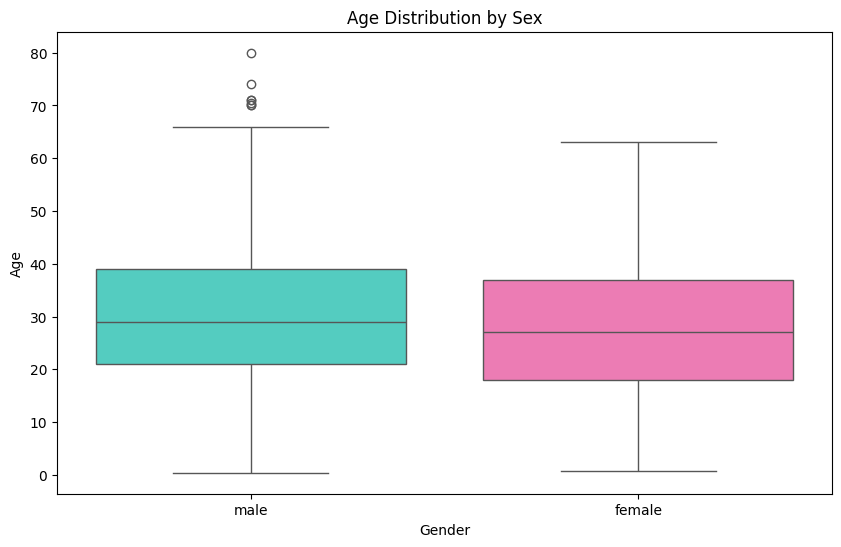

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sex', y='Age', data=data_train, palette = ['turquoise','hotpink'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Sex')

Age distribution by class


<ipython-input-38-6ba04e6eba7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Age', data=data_train,palette = ['bisque','goldenrod','darkorange'])


Text(0.5, 1.0, 'Age Distribution by Class')

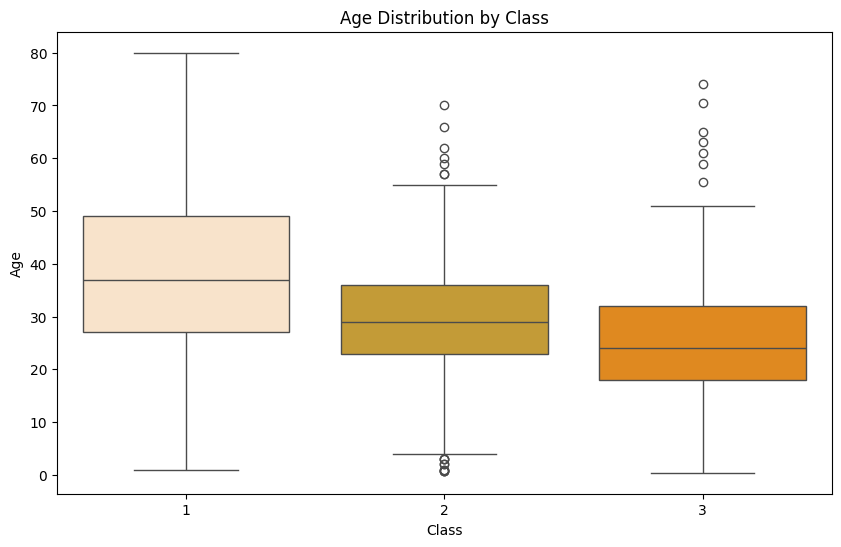

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Age', data=data_train,palette = ['bisque','goldenrod','darkorange'])
plt.xlabel('Class')
plt.ylabel('Age')
plt.title('Age Distribution by Class')

Fnd out the number of survivors per age group vs how many there were


In [39]:
child = data_train.loc[(data_train.Age <= 12) & (data_train.Survived == 1)]['Survived'].count()

teen = data_train.loc[(data_train.Age == 13) & (data_train.Age <= 17) & (data_train.Survived == 1)]['Survived'].count()

young_adult = data_train.loc[(data_train.Age == 18) & (data_train.Age <= 30) & (data_train.Survived == 1)]['Survived'].count()

adults = data_train.loc[(data_train.Age == 31) & (data_train.Age <= 49) & (data_train.Survived == 1)]['Survived'].count()

senior = data_train.loc[(data_train.Age >= 51) & (data_train.Survived == 1)]['Survived'].count()




how many there were originally

In [40]:
child_original = data_train.loc[data_train.Age <= 12]['Age'].count()

teen_original = data_train.loc[data_train.Age == 13]['Age'].count()

young_adult_original = data_train.loc[data_train.Age == 18]['Age'].count()

adults_original = data_train.loc[data_train.Age == 31]['Age'].count()

senior_original = data_train.loc[data_train.Age >= 51]['Age'].count()




Lets combine both of the datsets together

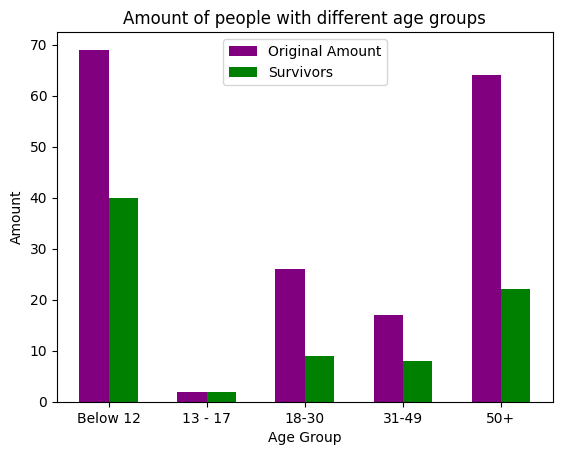

In [41]:
age_groups = ['Below 12','13 - 17','18-30','31-49','50+']
age_survivors = [child,teen,young_adult,adults,senior]
original = [child_original,teen_original,young_adult_original,adults_original,senior_original]


bar_width = 0.3
x = range(len(age_groups))

plt.bar(x,original,width=bar_width,label = 'Original Amount',color = 'purple')
plt.bar([p + bar_width for p in x], age_survivors, width=bar_width, label='Survivors', color='green')
plt.title('Amount of people with different age groups')
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.xticks([p + bar_width/2 for p in x], age_groups)
plt.legend()
plt.show()

<ipython-input-70-e3938e6299a4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Parch', data = data_train, palette = ['lawngreen','darkgreen'])
<ipython-input-70-e3938e6299a4>:1: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='Parch', data = data_train, palette = ['lawngreen','darkgreen'])


Text(0, 0.5, 'Passenger Count')

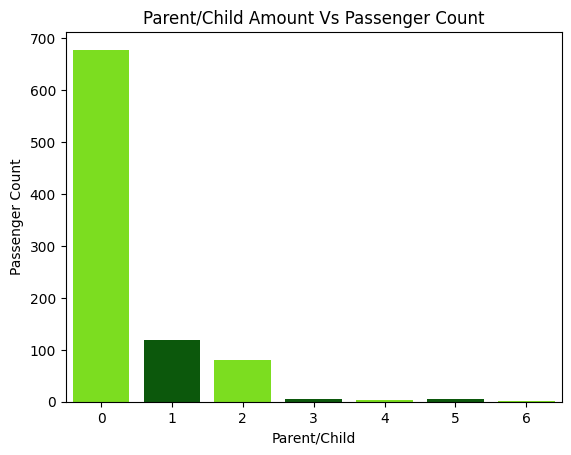

In [70]:
ax = sns.countplot(x='Parch', data = data_train, palette = ['lawngreen','darkgreen'])

ax.set_title('Parent/Child Amount Vs Passenger Count')


ax.set_xlabel('Parent/Child')
ax.set_ylabel('Passenger Count')

